<a href="https://colab.research.google.com/github/yh08037/Introduction-to-Intelligent-Systems/blob/master/HW5_2_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5-2 Principal Component Analysis
## B) Reduing demension of some real data
### 1. Loading data and Initialization

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


name_file = "./diabetes.csv"

x = np.asarray(pd.read_csv(name_file))


I, N = x.shape

P = 3

### 2. Implement the PCA

In [0]:
# compute mu : centroid of data

mu = np.zeros(N)

for i in range(I):
    mu += x[i]
mu = mu / I


# compute x_tilde : translate x so that the centroid is origin

x_tilde = np.empty(x.shape)

for i in range(I):
    x_tilde[i] = x[i] - mu
    

# compute sigma : covariance matrix
    
sigma = np.zeros((N, N))

for i in range(I):
    sigma += np.matmul(x_tilde[i].reshape(-1, 1), x_tilde[i].reshape(1, -1))
sigma = sigma / I


# get eigenvalues, eigenvectors of sigma

eigvals, eigvecs = np.linalg.eig(sigma)


# get u : P pricipal eigenvectors
#       : eigenvectors correspoding to the P highest eigenvalues

u = eigvecs[:, eigvals.argsort()[-P:]]


# compute y : project x_tilde onto u

y = np.empty((I, P))

for i in range(I):
    y[i] = np.asarray([np.dot(u[:, p], x_tilde[i]) for p in range(P)])
    

### 3. Indicate the principal axes of the data

In [0]:
print('Principal axes of the data')
for p in range(P):
    print(' u%d : ' %(p+1), u[:, p], '\tnorm : ', np.linalg.norm(u[:, p]))

Principal axes of the data
 u1 :  [-2.24647879e-02  1.43425064e-01 -9.22468119e-01 -3.07012017e-01
  2.09774173e-02 -1.32444012e-01 -6.39970270e-04 -1.25454382e-01
  3.09320895e-04] 	norm :  0.9999999999999999
 u2 :  [ 2.26500774e-02  9.72185778e-01  1.41901298e-01 -5.78559304e-02
 -9.46290072e-02  4.69772538e-02  8.16920737e-04  1.40168383e-01
  7.01033714e-03] 	norm :  0.9999999999999999
 u3 :  [-2.02174881e-03  9.78118564e-02  1.60930708e-02  6.07566786e-02
  9.93110644e-01  1.40108503e-02  5.37168857e-04 -3.56468123e-03
  5.85325534e-04] 	norm :  0.9999999999999999


### 4. Test model with new data

In [0]:
I_test = 10

x_test = np.hstack([np.random.uniform(0, x[:, n].max(), (I_test, 1)) for n in range(N)])

x_test_tilde = np.empty(x_test.shape)

for i in range(I_test):
    x_test_tilde[i] = x_test[i] - mu
    
y_test = np.empty((I_test, P))

for i in range(I_test):
    y_test[i] = np.asarray([np.dot(u[:, p], x_test_tilde[i]) for p in range(P)])
    
print('x_test\n')
print(x_test)
print()
print('x_test_tilde\n')
print(x_test_tilde)
print()
print('y_test\n')
print(y_test)

x_test

[[1.43240451e+01 6.61071579e+01 7.95855862e+01 7.22190000e+01
  1.06874048e+02 4.61058841e+01 1.09388513e+00 7.02489835e+01
  1.55430992e-01]
 [1.06709528e+01 3.93592679e+01 3.50257972e+01 8.45799513e+01
  2.81178168e+02 1.18837244e+01 1.75063103e+00 5.86070785e+01
  4.21669969e-01]
 [8.27348024e-01 1.24995366e+02 6.91657462e+01 3.11058300e+01
  7.36583322e+02 2.06020917e+01 2.23094860e+00 1.51746413e+01
  8.79703203e-01]
 [1.96623732e+00 4.10068219e+00 9.44095795e+01 2.38608310e+01
  1.21115794e+02 5.66252413e+01 2.32870476e+00 7.67344021e+01
  2.78986203e-01]
 [1.69077404e+01 6.61897786e+01 3.45080083e+01 9.08215264e+01
  7.75698485e+02 3.63835241e+01 1.63832711e-01 2.72024885e+01
  6.73460017e-01]
 [4.34999088e-01 7.32495357e+01 9.69528977e+01 5.45687042e+01
  7.63331860e+01 5.72144582e+01 4.31396211e-01 6.62089207e+01
  8.02740892e-01]
 [1.63183923e+01 1.12111195e+02 5.42305344e+01 5.64275132e+01
  4.01195378e+02 1.59674654e-01 2.24392343e+00 5.58581448e+01
  3.91493860e-01

### 5. Plot training and test results

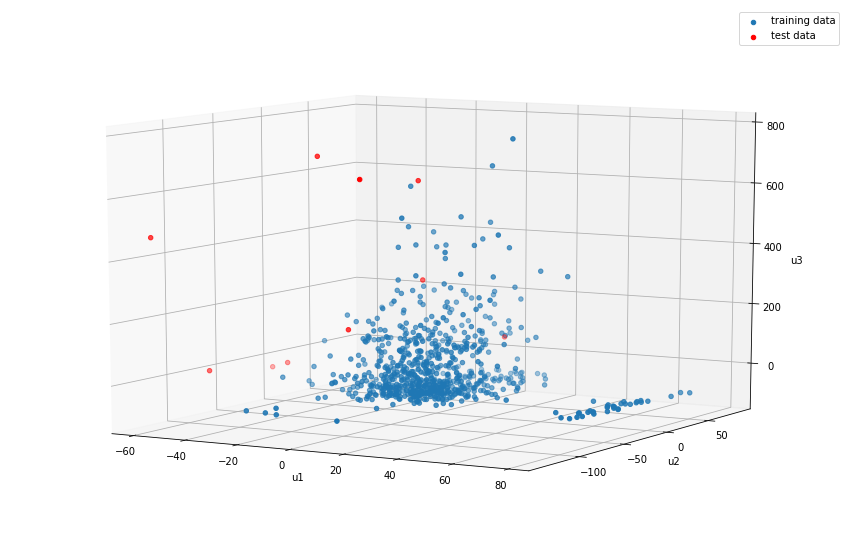

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

ax.scatter(y[:, 0], y[:, 1], y[:, 2], label = 'training data')
ax.scatter(y_test[:, 0], y_test[:, 1], y_test[:, 2], c='r', label='test data')

ax.set_xlabel('u1')
ax.set_ylabel('u2')
ax.set_zlabel('u3')

ax.view_init(10, )

plt.legend()

plt.show()